In [135]:
import pandas as pd
pd.set_option('display.max_rows', None)  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# Importation
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [ ]:
### Explaining non-motivation

# Unique df with all the variables
df = pd.merge(X_train, y_train)

<bound method IndexOpsMixin.nunique of 0          0.75
1          1.00
2          1.00
3           NaN
4          1.00
           ... 
1172081    0.50
1172082     NaN
1172083    1.00
1172084    1.00
1172085    1.00
Name: ST005, Length: 1172086, dtype: float64>

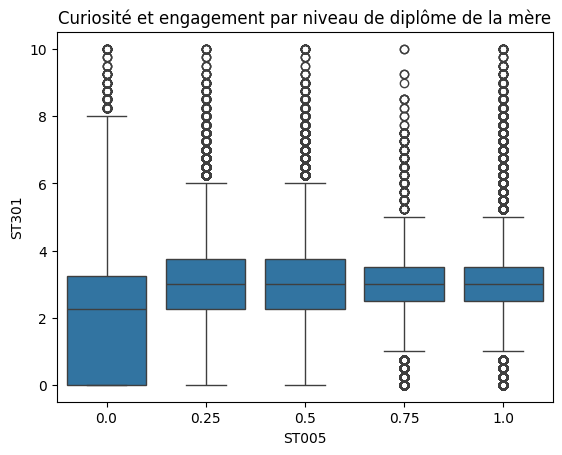

In [ ]:
# Curiosity and engagement according to the degree of the mother

# Correlation
df_ST005_ST301 = df.copy()
df_ST005_ST301 = df_ST005_ST301.dropna(subset=['ST005', 'ST301'])
df_ST005_ST301['ST005'].corr(df_ST005_ST301['ST301'], method='spearman') 

# Plot
sns.boxplot(x='ST005', y='ST301', data=df_ST005_ST301)
plt.title("Curiosity and engagement according to the degree of the mother")
plt.show()


In [ ]:
# Correlation with curiosity and engagement
df_num = df.select_dtypes(include=['int64', 'float64'])
corr_target = df_num.corr()['ST301'].sort_values(ascending=False)

ST301                       1.000000
ST305                       0.682628
ST267                       0.435480
ST343                       0.424315
ST311                       0.419354
                              ...   
science_q15_total_timing         NaN
science_q16_total_timing         NaN
science_q17_total_timing         NaN
science_q18_total_timing         NaN
science_q19_total_timing         NaN
Name: ST301, Length: 300, dtype: float64


In [136]:
print(corr_target)

ST301                        1.000000
ST305                        0.682628
ST267                        0.435480
ST343                        0.424315
ST311                        0.419354
ST275                        0.389138
ST345                        0.384858
ST290                        0.377367
ST034                        0.350680
ST336                        0.333959
ST340                        0.311174
ST354                        0.298388
ST270                        0.292693
ST342                        0.283821
ST351                        0.272511
ST348                        0.271802
ST355                        0.261747
ST296                        0.250126
ST331                        0.248037
ST353                        0.221976
ST268                        0.218628
ST349                        0.207530
ST352                        0.193673
ST283                        0.191066
ST289                        0.188962
ST322                        0.184647
ST226       

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

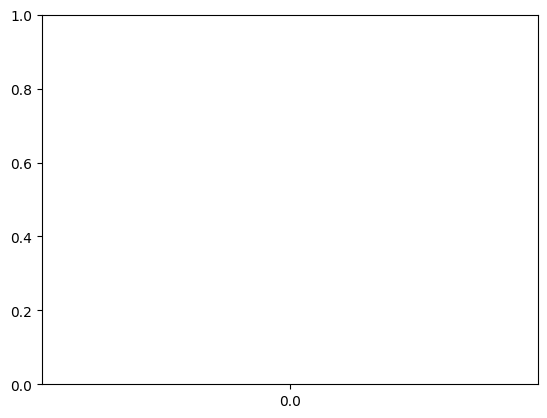

In [ ]:
# Curiosity and engagement according to the income

# Correlation
df_PA042_ST301 = df.copy()
df_PA042_ST301 = df_PA042_ST301.dropna(subset=['PA042', 'ST301'])
df_PA042_ST301['PA042'].corr(df_PA042_ST301['ST301'], method='spearman') 

# Plot
sns.barplot(x='PA042', y='ST301', data=df_PA042_ST301)
plt.title("Curiosity and engagement according to the income")
plt.show()

In [116]:
df['PA042'].unique

<bound method Series.unique of 0          0.0
1          0.0
2          0.0
3          NaN
4          0.0
          ... 
1172081    0.0
1172082    NaN
1172083    0.4
1172084    0.0
1172085    0.0
Name: PA042, Length: 1172086, dtype: float64>

In [114]:
df.dtypes

Unnamed: 0                    int64
Year                          int64
CNT                          object
CNTRYID                     float64
CNTSCHID                    float64
                             ...   
science_q17_total_timing    float64
science_q18_total_timing    float64
science_q19_total_timing    float64
MathScore                   float64
OCOD1_agr                    object
Length: 304, dtype: object

In [ ]:
df = df.dropna(axis=1, how='all')
df.corr()

ValueError: could not convert string to float: 'NLD'

In [76]:
df['IC177'].corr(df_PA042_ST301['reading_q1_average_score'], method='spearman') 

np.float64(0.10238598431360735)

In [89]:
# Regression : maths ~ hours with digital devices

import statsmodels.formula.api as smf

df_ST301_ST036 = df[['ST301', 'ST036']].dropna().copy()
df_ST301_ST036.shape

model = smf.ols("ST301 ~ ST036", data=df_ST301_ST036).fit()
print(model.summary())


ValueError: zero-size array to reduction operation maximum which has no identity

In [104]:
# Filter columns that are entirely missing
df = df.dropna(axis=1, how='all')

# Drop rows where target is NaN
df_clean = df.dropna(subset=["ST301"])  # drop rows with missing target
X = df_clean.drop(columns=["ST301"])
y = df_clean["ST301"].copy()

# Identify categorical and numerical columns *from X*
cat_columns = X.select_dtypes(include='object').columns.tolist()
num_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    test_size=0.2,
    random_state=42
)

# Filtering the missing values
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test[X_train.columns]  # keep same columns

# Preprocessing pipelines
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Assemble column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ],
    remainder='drop'
)

In [105]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [108]:
pipeline.fit(X_train, y_train)
r2_score = pipeline.score(X_test_small, y_test_small)
print("R^2 score:", r2_score)

ValueError: A given column is not a column of the dataframe